In [17]:
import os
import pandas as pd
os.chdir("/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources")
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from functions import *

# K-means

/Users/vladbuinceanu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vladbuinceanu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


3
[[0.40459558 0.21826799]
 [0.48182607 0.78341128]
 [1.00385954 1.00227575]
 [1.21375339 0.10175668]]
7.808705977244584
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

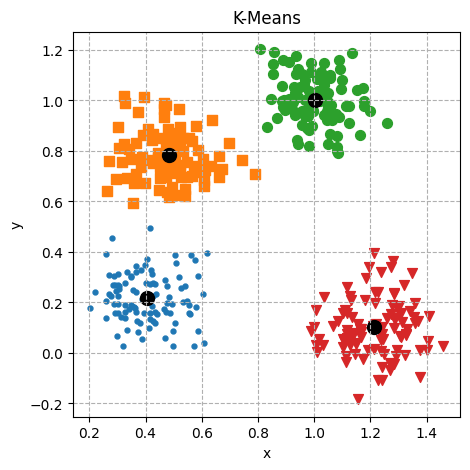

In [14]:
from sklearn.cluster import KMeans
clusterExample = pd.read_csv("clustering example.csv")
kmeansmodel = KMeans(n_clusters=4)
kmeansmodel.fit(clusterExample)
# # print the number of iterations required to converge
print(kmeansmodel.n_iter_)
# # print the final locations of the centroid
print(kmeansmodel.cluster_centers_)
# # print the lowest SSE value
print(kmeansmodel.inertia_)
# print the cluster labels for each point
print(kmeansmodel.labels_)
# predict cluster label for a new point
kmeansmodel.predict([[1.25,0.09]])
# print the labels
print(kmeansmodel.labels_)
# plot the points and the cluster
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(linestyle='--')
ax.set_title('K-Means')
# put unique labels in labels and retrieve the list of markers
labels = set(kmeansmodel.labels_)
markers = list(matplotlib.markers.MarkerStyle.markers.keys())
# plot all points in a different color and marker
for m, l in zip(markers, labels):
    indices = np.where(kmeansmodel.labels_ == l)[0] # is a tuple => [0]
    ax.scatter(clusterExample.loc[indices, 'x'], clusterExample.loc[indices, 'y'],marker=m, s=50)
# plot the cluster center in the middle of the clusterplot
ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], marker= "o" , c='black', s=100)
plt.show()

# Hierarchical clustering

/Users/vladbuinceanu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


4
[1 2 1 0 3 2 2 1 0 2]


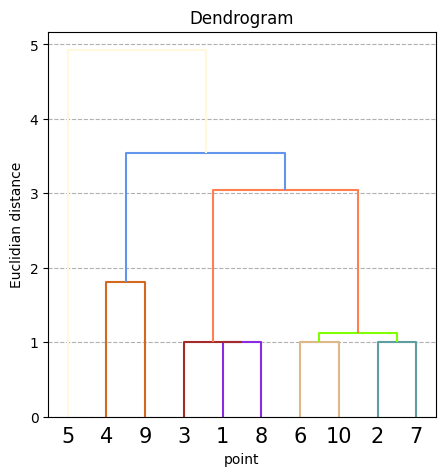

In [16]:
from sklearn.cluster import AgglomerativeClustering
hcExample = pd.read_csv ("hclust.csv")
hcExample.index = range(1, hcExample.shape[0]+1)
hcmodel = AgglomerativeClustering(linkage='single',

                                      affinity = 'euclidean'

                                      , n_clusters=4)

hcmodel.fit(hcExample)

 # print the number of clusters found
print(hcmodel.n_clusters)
# print the labels for each point
print(hcmodel.labels_)



 # Draw the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
colors = list(matplotlib.colors.cnames.keys()) # 148
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
distances = linkage(hcExample, method='single')
ax.set_title("Dendrogram")
ax.set_xlabel('point')
ax.set_ylabel('Euclidian distance')
ax.grid(linestyle='--', axis='y')
dgram = dendrogram(distances, labels=list(range(1, hcExample.shape[0]+1)), link_color_func=lambda x: colors[x], leaf_font_size=15., ax=ax)
plt.show()

# Hierarchical clustering - practical

In [29]:
# Cut a Tree into Groups of clusters
from scipy.cluster.hierarchy import cut_tree, linkage
hcExample = pd.read_csv("hclust.csv")
hcExample.index = ['point {}'.format(i) for i in range(1,hcExample.shape[0]+1)]

distances = linkage(hcExample, method='single')
cuttree = cut_tree(distances, height=[2.5])
cuttree


array([[0],
       [1],
       [0],
       [2],
       [3],
       [1],
       [1],
       [0],
       [2],
       [1]])

# Density-based clustering - practical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   500 non-null    int64  
 1   X1      500 non-null    float64
 2   X2      500 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


DBSCAN(eps=0.2, min_samples=100)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

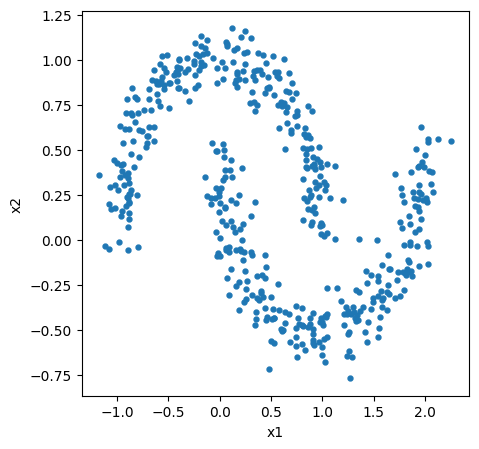

In [37]:
# create dataset
from sklearn.datasets import make_moons
x1, x2 = make_moons(n_samples=500, noise=0.1)
dbExample=pd.DataFrame(x1,x2)
dbExample=dbExample.rename(columns={0: "X1", 1:"X2"})
dbExample.reset_index(inplace=True)
dbExample.info()
# perform density-based clustering
from sklearn.cluster import DBSCAN
dbModel = DBSCAN(eps=0.2, min_samples=100)
dbModel.fit(dbExample)
dbModel.labels_
# plot all points in a different color and marker
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
labels = set(dbModel.labels_)
markers = list(matplotlib.markers.MarkerStyle.markers.keys())
for m, l in zip(markers, labels):
    indices = np.where(dbModel.labels_ == l)[0] # return a tuple therefore [0]
ax.scatter(dbExample.loc[indices, 'X1'], dbExample.loc[indices, 'X2'],marker=m, s=50)
plt.show()

# Clustering and decision trees

/Users/vladbuinceanu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x <= 0.798\nentropy = 2.0\nsamples = 400\nvalue = [100, 100, 100, 100]\nclass = cluster 0'),
 Text(0.25, 0.5, 'y <= 0.544\nentropy = 1.0\nsamples = 200\nvalue = [100, 0, 0, 100]\nclass = cluster 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 100\nvalue = [100, 0, 0, 0]\nclass = cluster 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 100\nvalue = [0, 0, 0, 100]\nclass = cluster 3'),
 Text(0.75, 0.5, 'y <= 0.593\nentropy = 1.0\nsamples = 200\nvalue = [0, 100, 100, 0]\nclass = cluster 1'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 100\nvalue = [0, 0, 100, 0]\nclass = cluster 2'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 100\nvalue = [0, 100, 0, 0]\nclass = cluster 1')]

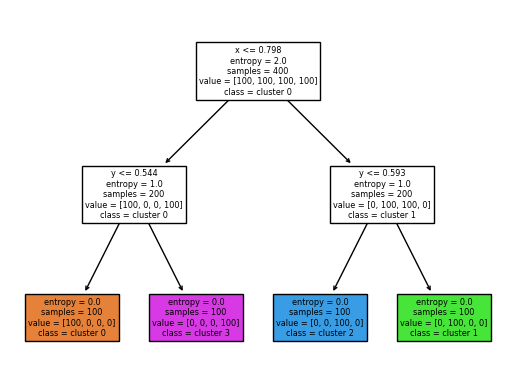

In [38]:
#See data in ‘clustering example.csv’
clusterExample = pd.read_csv('Clustering example.csv')
#Determine 4 clusters
kmeansmodel = KMeans(n_clusters=4)
kmeansmodel.fit(clusterExample)

# Use DecisionTreeClassifier to obtain the decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(clusterExample, kmeansmodel.labels_)
# Plot the decision tree
tree.plot_tree(classifier, feature_names=['x', 'y'], class_names=['cluster {}'.format(i) for i in
                                np.unique(kmeansmodel.labels_)],filled=True)

plt.show()
